In [ ]:
# Downloading the Dataset
!wget "https://raw.githubusercontent.com/tharunoptimus/datascience/main/Dataset.csv" --no-check-certificate 
!mv Dataset.csv data.csv

--2022-03-21 16:30:19--  https://raw.githubusercontent.com/tharunoptimus/datascience/main/Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 924700 (903K) [text/plain]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>] 903.03K  --.-KB/s    in 0.03s   

2022-03-21 16:30:19 (28.0 MB/s) - ‘Dataset.csv’ saved [924700/924700]



In [ ]:
# import pandas as pd
import pandas as pd
# Reading the CSV file
df = pd.read_csv("data.csv")

# Printing top 5 rows
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Getting Information about the Dataset

We will use the shape parameter to get the shape of the dataset.

In [ ]:
df.shape

(13320, 9)

We can see that the dataframe contains 1 columns and 4424 rows.

Now, let’s also the columns and their data types. For this, we will use the info() method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Let’s get a quick statistical summary of the dataset using the describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Checking Missing Values

We will check if our data contains any missing values or not. Missing values can occur when no information is provided for one or more items or for a whole unit. We will use the isnull() method

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see that almost all columns has a missing value.

### Checking Duplicates

Let’s see if our dataset contains any duplicates or not. Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [ ]:
data = df.drop_duplicates(subset = "area_type",)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
297,Carpet Area,Ready To Move,Maruthi Sevanagar,2 BHK,SMikaay,950,2.0,2.0,47.00


We have only 3 unique species

Let’s see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not. We will use the Series.value_counts() function. This function returns a Series containing counts of unique values. 

In [ ]:
df.value_counts("area_type")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
dtype: int64

We can see that all the species contain different amount of rows, so we might be deleting some entries in the future.

## Data Visualization

### Visualizing the target column

Our target column will be the Species column because at the end we will need the result according to the species only. Let’s see a countplot for species.

*Note: We will use Matplotlib and Seaborn library for the data visualization*

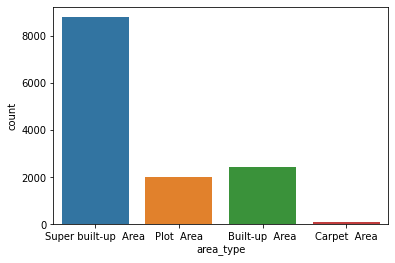

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='area_type', data=df, )
plt.show()


### Relation between variables

We will see the relationship between the `area_type` and `size` and also between `size` and `prize`.

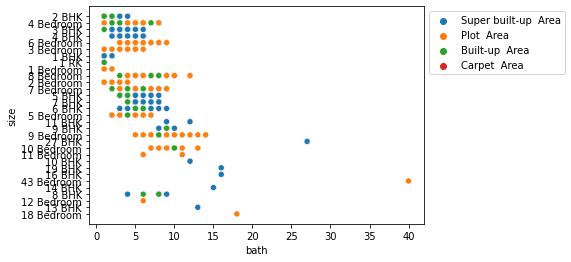

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='bath', y='size',
                hue='area_type', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


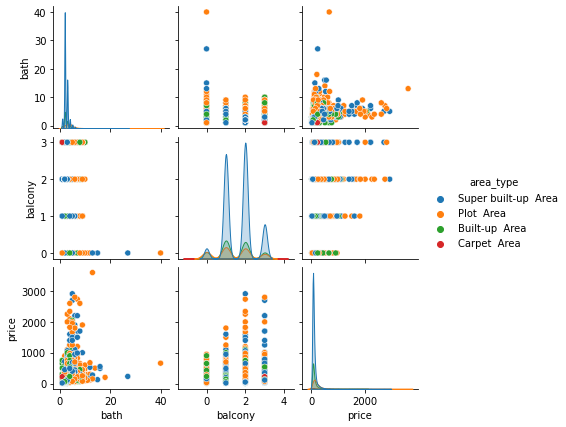

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='area_type', height=2)


We can see many types of relationships from this plot

## Histograms

Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

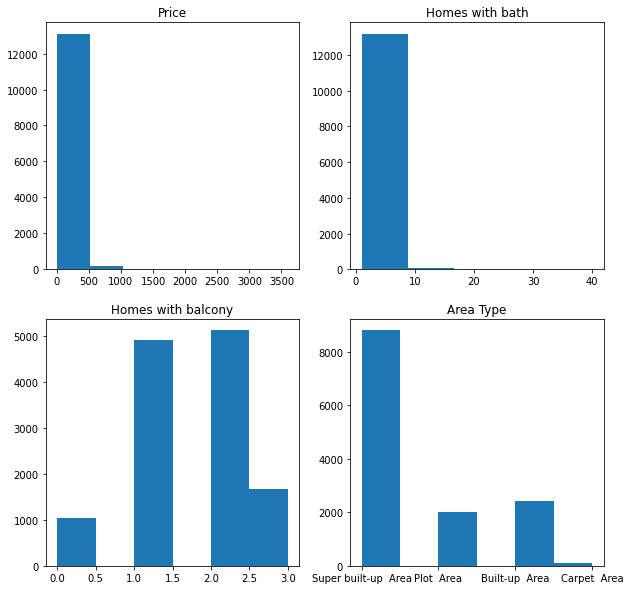

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
  
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Price")
axes[0,0].hist(df['price'], bins=7)
  
axes[0,1].set_title("Homes with bath")
axes[0,1].hist(df['bath'], bins=5);
  
axes[1,0].set_title("Homes with balcony")
axes[1,0].hist(df['balcony'], bins=6);
  
axes[1,1].set_title("Area Type")
axes[1,1].hist(df['area_type'], bins=6);

From the above plot, we can see that – 

- The highest frequency of the Price is around 12000 which is between 0 and 500
- The highest frequency of the Homes with bath is around 12000 which is between 0 to 10
- The highest frequency of the Homes with balcony is around 4700 which is between 1.0 to 1.5 and 2.0 to 2.5
- The highest frequency of the Area type is around 8000 which is Super Built-up

### Histograms with Distplot Plot
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

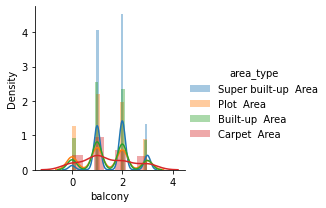

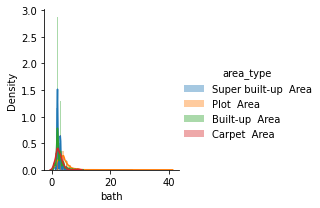

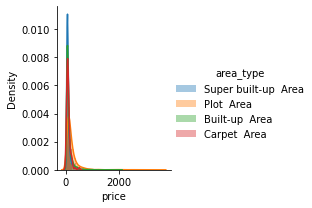

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.FacetGrid(df, hue="area_type")
plot.map(sns.distplot, "balcony").add_legend()

plot = sns.FacetGrid(df, hue="area_type")
plot.map(sns.distplot, "bath").add_legend()

plot = sns.FacetGrid(df, hue="area_type")
plot.map(sns.distplot, "price").add_legend()

plt.show()

## Handling Correlation
Pandas `dataframe.corr()` is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [ ]:
data.corr(method='pearson')

,bath,balcony,price
bath,1.000000,0.522233,0.965625
balcony,0.522233,1.000000,0.722526
price,0.965625,0.722526,1.000000


## Heatmaps
The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

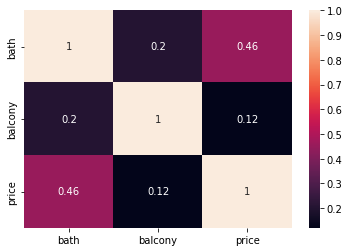

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.heatmap(df.corr(method='pearson'),
            annot = True);
  
plt.show()

From the above graph, we can see that 

1. Price and bath have high correlations.

## Box Plots
We can use boxplots to see how the categorical value os distributed with other numerical values.

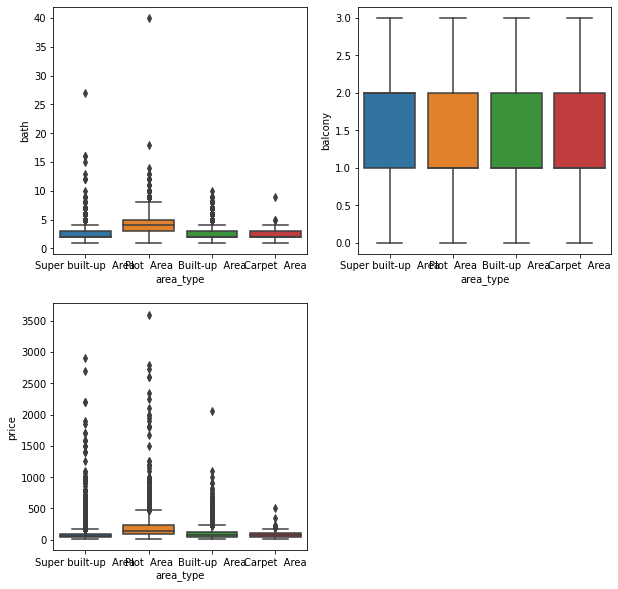

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
	sns.boxplot(x="area_type", y=y, data=df)

plt.figure(figsize=(10,10))
	
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('bath')

plt.subplot(222)
graph('balcony')

plt.subplot(223)
graph('price')

plt.show()

## Handling Outliers

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

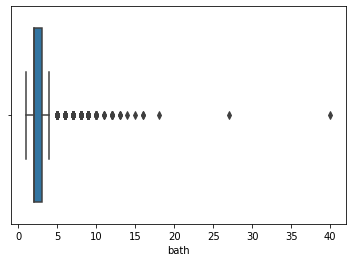

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='bath', data=df)


In the above graph, the values above 4 are acting as outliers.

## Removing Outliers
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

Old Shape:  (13320, 9)
New Shape:  (13320, 9)


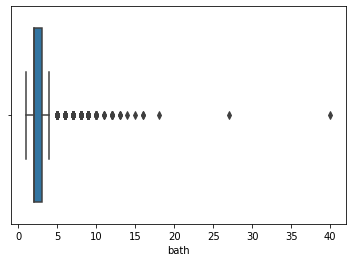

In [ ]:
# Importing
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

# IQR
Q1 = np.percentile(df['bath'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['bath'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['bath'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['bath'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='bath', data=df)
